<a href="https://colab.research.google.com/github/zerroukines/BreastcancerUsingLgR/blob/main/BreastcancerUsingLgR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modeling of Breast Cancer Tumor Classification: A Logistic Regression Approach**

dataset source: https://www.kaggle.com/datasets/marshuu/breast-cancer/data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv("/breast_cancer.csv")
print(data.head(10))

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   
5                8                       10                        10   
6                1                        1                         1   
7                2                        1                         2   
8                2                        1                         1   
9                4                        2                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10  

In [5]:
# Separate features (X) and labels (y)
X = data.iloc[:, 1:-1]  # Features (columns 2 to -2)
y = data["Class"]       # Labels (column "Class")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [13]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x7d503f9afbe0>,
 [Text(0, 0, 'Benign'), Text(0, 1, 'Malignant')])

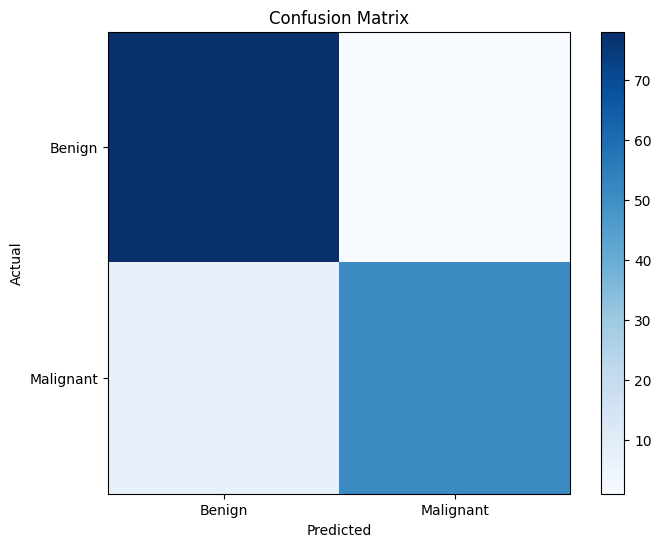

In [14]:
# Visualize the results
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])

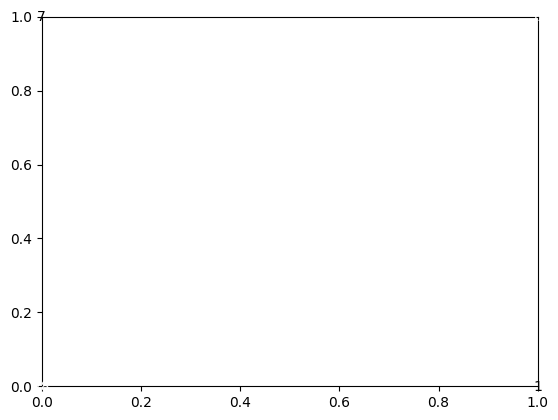

Classification Report:
               precision    recall  f1-score   support

           2       0.92      0.99      0.95        79
           4       0.98      0.88      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137

Accuracy: 0.94


In [15]:
# Add annotations to the plot
thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j]}', ha='center', va='center', color='white' if conf_matrix[i, j] > thresh else 'black')

plt.show()

# Print classification report
print("Classification Report:\n", classification_rep)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

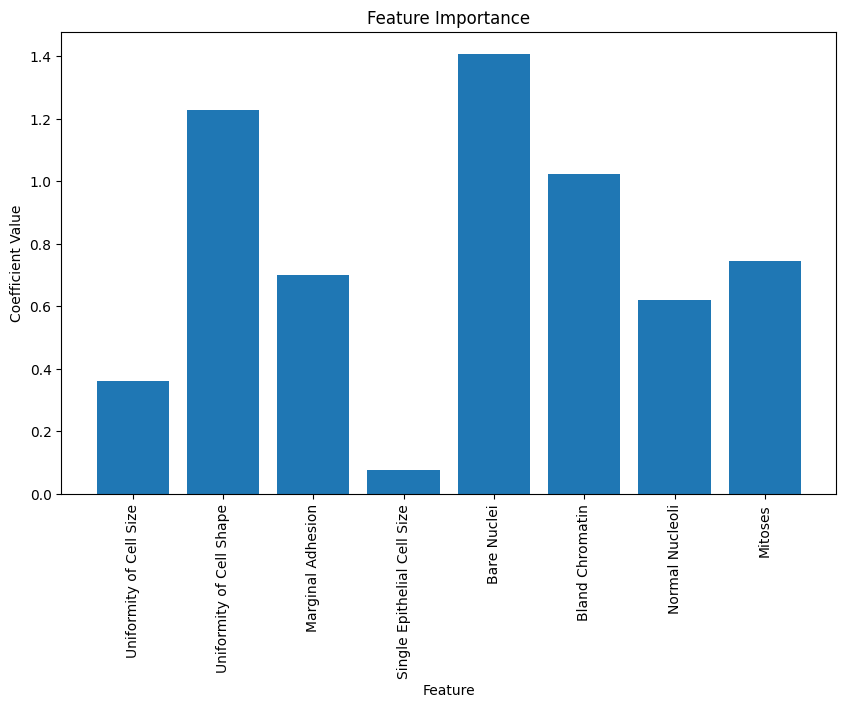

In [16]:
# Visualize feature importance (coefficients)
plt.figure(figsize=(10, 6))
plt.bar(range(len(model.coef_[0])), model.coef_[0])
plt.xticks(range(len(model.coef_[0])), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

In [19]:
# Test the trained model with a new data point
# For example, let's create a hypothetical new data point:
new_data_point = {
    'Clump Thickness': 6,
    'Uniformity of Cell Size': 3,
    'Uniformity of Cell Shape': 3,
    'Marginal Adhesion': 2,
    'Single Epithelial Cell Size': 4,
    'Bare Nuclei': 3,
    'Bland Chromatin': 4,
    'Normal Nucleoli': 2,
    'Mitoses': 1
}

# Convert the new data point into a DataFrame
new_df = pd.DataFrame([new_data_point])

# Ensure the order of columns matches the original dataset
new_df = new_df[X.columns]

# Scale the new data point using the same scaler used for training
scaled_new_data = scaler.transform(new_df)

# Make a prediction for the new data point
prediction = model.predict(scaled_new_data)

# Interpret the prediction
if prediction[0] == 2:
    result = "Benign"
else:
    result = "Malignant"

print(f"The model predicts that the tumor is {result}.")


The model predicts that the tumor is Benign.
